# Preliminary Analysis 

In [2]:
# In this notebook, we will load the data and perform preliminary analysis

In [3]:
# Open Spark session 
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import *
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("Data_Explorer")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/09/01 20:59:46 WARN Utils: Your hostname, Chaitanyas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.12.182.211 instead (on interface en0)
22/09/01 20:59:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/01 20:59:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/09/01 20:59:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/09/01 20:59:47 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [4]:
bb = spark.read.parquet('../data/tables/transactions_20210228_20210827_snapshot/order_datetime=2021-02-28/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet')
tt = spark.read.parquet('../data/tables/consumer_user_details.parquet')
gg = spark.read.parquet('../data/tables/tbl_merchants.parquet')
vv = spark.read.option("delimiter", "|").option("header",True).csv('../data/tables/tbl_consumer.csv')

In [5]:
bb = bb.join(tt, ['user_id'])
vv = vv.join(tt, ['consumer_id'])
bb

user_id,merchant_abn,dollar_value,order_id,consumer_id
1,83690644458,30.441348317517228,40a2ff69-ea34-465...,1195503
1,28000487688,133.22689421562643,0c37b3f7-c7f1-48c...,1195503
2,80779820715,48.12397733548124,cd09bdd6-f56d-489...,179208
3,32361057556,87.34942171371054,633a7656-2fcc-4b8...,1194530
3,29566626791,46.33087226118639,26b7574e-81c2-455...,1194530
5,83177825742,66.66426160206629,43e3b3fe-791b-47f...,712975
6,21772962346,113.04510652600983,000ca5ac-3247-4ef...,407340
7,66079287213,89.93535555889761,50a5619d-0647-487...,511685
11,20692490685,196.93916081228323,09bc8dd6-419f-4cb...,428325
11,98269572896,129.46280909485031,8f5d0cab-8055-435...,428325


In [6]:
data = bb.join(vv, ['user_id'])
gg = gg.withColumnRenamed('name','company_name')
data = data.join(gg, ['merchant_abn'])
data

merchant_abn,user_id,dollar_value,order_id,consumer_id,consumer_id,name,address,state,postcode,gender,company_name,tags
28000487688,1,133.22689421562643,0c37b3f7-c7f1-48c...,1195503,1195503,Yolanda Williams,413 Haney Gardens...,WA,6935,Female,Sed Nunc Industries,"((books, periodic..."
83690644458,1,30.441348317517228,40a2ff69-ea34-465...,1195503,1195503,Yolanda Williams,413 Haney Gardens...,WA,6935,Female,Id Erat Etiam Con...,"[(gift, card, nov..."
80779820715,2,48.12397733548124,cd09bdd6-f56d-489...,179208,179208,Mary Smith,3764 Amber Oval,NSW,2782,Female,Euismod Enim LLC,"([watch, clock, a..."
32361057556,3,87.34942171371054,633a7656-2fcc-4b8...,1194530,1194530,Jill Jones MD,40693 Henry Greens,NT,862,Female,Orci In Consequat...,"([gift, card, nov..."
83177825742,5,66.66426160206629,43e3b3fe-791b-47f...,712975,712975,Rebecca Blanchard,9271 Michael Mano...,WA,6355,Female,Sed Facilisis Corp.,"([gift, card, nov..."
21772962346,6,113.04510652600983,000ca5ac-3247-4ef...,407340,407340,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,Purus Gravida Sag...,((florists suppli...
66079287213,7,89.93535555889761,50a5619d-0647-487...,511685,511685,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,Hendrerit Corpora...,"((gift, card, nov..."
98269572896,11,129.46280909485031,8f5d0cab-8055-435...,428325,428325,Eugene Lucas,33983 Kevin Drive...,VIC,3063,Undisclosed,Eget Laoreet Posu...,"[(furniture, home..."
20692490685,11,196.93916081228323,09bc8dd6-419f-4cb...,428325,428325,Eugene Lucas,33983 Kevin Drive...,VIC,3063,Undisclosed,Aliquet Molestie ...,"[[stationery, off..."
95508140753,12,79.1030216530725,17b4325f-65a5-45e...,1494640,1494640,Melissa Jones,13706 Kimberly Port,WA,6743,Female,Ullamcorper Velit...,"[(cable, sateLlit..."


In [7]:
data.createOrReplaceTempView('las')
agg_data = spark.sql("""
select company_name, sum(dollar_value) from las
group by company_name""")

In [8]:
agg_data.count()

1922

In [9]:
# sketch
agg_data = agg_data.toPandas()

<AxesSubplot:xlabel='sum(dollar_value)', ylabel='Count'>

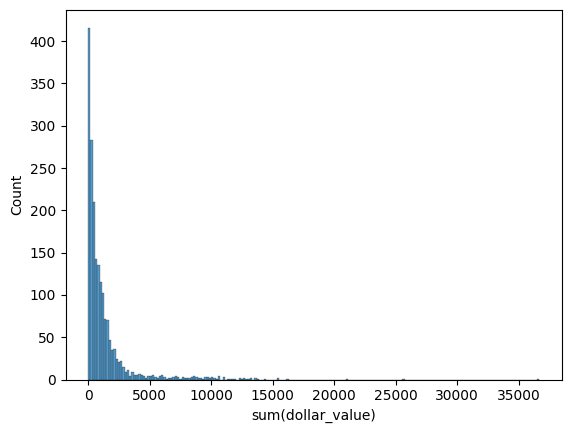

In [10]:
import seaborn as sns
sns.histplot(x = 'sum(dollar_value)', data=agg_data)

# Beaker line 

Loading all the datasets,

In [11]:
transactions_data = spark.read.parquet('../data/tables/transactions_20210228_20210827_snapshot/order_datetime=2021-02-28/part-00001-cfff5211-ef46-4b99-a6ed-63c9b2c7fe15.c000.snappy.parquet')
transactions_data.show(5)
user_data = spark.read.parquet('../data/tables/consumer_user_details.parquet')
user_data.show(5)

+-------+------------+------------------+--------------------+
|user_id|merchant_abn|      dollar_value|            order_id|
+-------+------------+------------------+--------------------+
|      1| 28000487688|133.22689421562643|0c37b3f7-c7f1-48c...|
|  18485| 62191208634| 79.13140006851712|9e18b913-0465-4fd...|
|      1| 83690644458|30.441348317517228|40a2ff69-ea34-465...|
|  18488| 39649557865| 962.8133405407585|f4c1a5ae-5b76-40d...|
|      2| 80779820715| 48.12397733548124|cd09bdd6-f56d-489...|
+-------+------------+------------------+--------------------+
only showing top 5 rows

+-------+-----------+
|user_id|consumer_id|
+-------+-----------+
|      1|    1195503|
|      2|     179208|
|      3|    1194530|
|      4|     154128|
|      5|     712975|
+-------+-----------+
only showing top 5 rows



In [12]:
merchant_data = spark.read.parquet('../data/tables/tbl_merchants.parquet')
merchant_data.show(5)
consumer_data = spark.read.option("delimiter", "|").option("header",True).csv('../data/tables/tbl_consumer.csv')
consumer_data.show(5)

+--------------------+--------------------+------------+
|                name|                tags|merchant_abn|
+--------------------+--------------------+------------+
|       Felis Limited|((furniture, home...| 10023283211|
|Arcu Ac Orci Corp...|([cable, satellit...| 10142254217|
|    Nunc Sed Company|([jewelry, watch,...| 10165489824|
|Ultricies Digniss...|([wAtch, clock, a...| 10187291046|
| Enim Condimentum PC|([music shops - m...| 10192359162|
+--------------------+--------------------+------------+
only showing top 5 rows

+-----------------+--------------------+-----+--------+------+-----------+
|             name|             address|state|postcode|gender|consumer_id|
+-----------------+--------------------+-----+--------+------+-----------+
| Yolanda Williams|413 Haney Gardens...|   WA|    6935|Female|    1195503|
|       Mary Smith|     3764 Amber Oval|  NSW|    2782|Female|     179208|
|    Jill Jones MD|  40693 Henry Greens|   NT|     862|Female|    1194530|
|  Lindsay J

Joining all the datasets to create our main bnpl dataset,

In [13]:
transactions_data = transactions_data.join(user_data, ['user_id'])
consumer_data = consumer_data.join(user_data, ['consumer_id'])
bnpl_data = transactions_data.join(consumer_data, ['user_id'])
merchant_data = merchant_data.withColumnRenamed('name','company_name')
bnpl_data = bnpl_data.join(merchant_data, ['merchant_abn'])
bnpl_data

merchant_abn,user_id,dollar_value,order_id,consumer_id,consumer_id,name,address,state,postcode,gender,company_name,tags
28000487688,1,133.22689421562643,0c37b3f7-c7f1-48c...,1195503,1195503,Yolanda Williams,413 Haney Gardens...,WA,6935,Female,Sed Nunc Industries,"((books, periodic..."
83690644458,1,30.441348317517228,40a2ff69-ea34-465...,1195503,1195503,Yolanda Williams,413 Haney Gardens...,WA,6935,Female,Id Erat Etiam Con...,"[(gift, card, nov..."
80779820715,2,48.12397733548124,cd09bdd6-f56d-489...,179208,179208,Mary Smith,3764 Amber Oval,NSW,2782,Female,Euismod Enim LLC,"([watch, clock, a..."
32361057556,3,87.34942171371054,633a7656-2fcc-4b8...,1194530,1194530,Jill Jones MD,40693 Henry Greens,NT,862,Female,Orci In Consequat...,"([gift, card, nov..."
83177825742,5,66.66426160206629,43e3b3fe-791b-47f...,712975,712975,Rebecca Blanchard,9271 Michael Mano...,WA,6355,Female,Sed Facilisis Corp.,"([gift, card, nov..."
21772962346,6,113.04510652600983,000ca5ac-3247-4ef...,407340,407340,Karen Chapman,2706 Stewart Oval...,NSW,2033,Female,Purus Gravida Sag...,((florists suppli...
66079287213,7,89.93535555889761,50a5619d-0647-487...,511685,511685,Andrea Jones,122 Brandon Cliff,QLD,4606,Female,Hendrerit Corpora...,"((gift, card, nov..."
98269572896,11,129.46280909485031,8f5d0cab-8055-435...,428325,428325,Eugene Lucas,33983 Kevin Drive...,VIC,3063,Undisclosed,Eget Laoreet Posu...,"[(furniture, home..."
20692490685,11,196.93916081228323,09bc8dd6-419f-4cb...,428325,428325,Eugene Lucas,33983 Kevin Drive...,VIC,3063,Undisclosed,Aliquet Molestie ...,"[[stationery, off..."
95508140753,12,79.1030216530725,17b4325f-65a5-45e...,1494640,1494640,Melissa Jones,13706 Kimberly Port,WA,6743,Female,Ullamcorper Velit...,"[(cable, sateLlit..."


In [14]:
bnpl_data.createOrReplaceTempView('bnpl')

Making sure count of unique companies equals the count of unique abn numbers in dataset

In [ ]:
print(bnpl_data.select(countDistinct('company_name')), bnpl_data.select(countDistinct('merchant_abn')))

## Total Dollar Value based on companies


[Stage 359:=======>                                                 (1 + 7) / 8]



+--------------------+-----------------+
|        company_name| sum_dollar_value|
+--------------------+-----------------+
|Volutpat Nulla In...|1536.575551491866|
|Varius Orci Insti...|482.6917762381562|
|     Erat Semper Ltd|984.1797039115861|
|Elit Sed Consequa...|8690.190353449887|
|Mollis Integer Co...| 547.846466756815|
+--------------------+-----------------+
only showing top 5 rows



<AxesSubplot:xlabel='sum_dollar_value', ylabel='Count'>

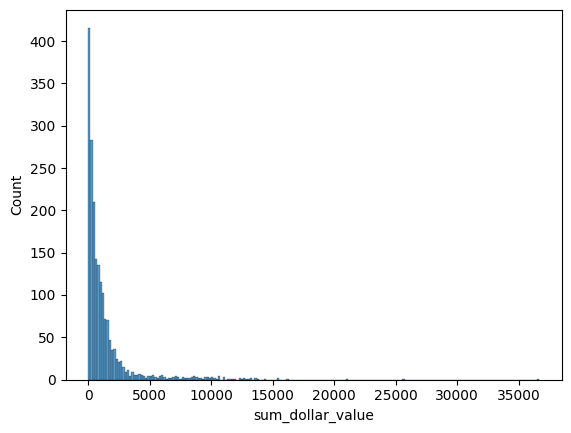

In [46]:
vis1_data = spark.sql("""
select company_name, sum(dollar_value) as sum_dollar_value from bnpl
group by company_name""")
vis1_data.show(5)
vis1_data = vis1_data.toPandas()
import seaborn as sns
sns.histplot(x = 'sum_dollar_value', data=vis1_data)

We can see most of the companies have total value of less than 5000, but we are concerned regarding the data for much higher dollar values. 

In [48]:
print(vis1_data.count())
vis1_data[vis1_data['sum_dollar_value'] > 15000].sort_values(by=['sum_dollar_value'])

company_name        1922
sum_dollar_value    1922
dtype: int64


,company_name,sum_dollar_value
1134,Dignissim Maecenas Foundation,15365.690304
1503,Torquent Per Inc.,15474.302349
1750,Suspendisse Non Leo PC,16261.718093
666,Tempus Mauris Ltd,20991.988536
20,Etiam Bibendum Industries,25653.477099
939,Lacus Aliquam Corporation,36649.616995


In [50]:
vis1_data['sum_dollar_value'].mean()

1340.3225980660684

Let's try to find out trends which can help us understand why these companies have much higher dollar value than the mean. We look at all the attributes for the above companies, 

In [55]:
bnpl_data.filter(col('company_name')=='Lacus Aliquam Corporation').limit(5)

merchant_abn,user_id,dollar_value,order_id,consumer_id,consumer_id,name,address,state,postcode,gender,company_name,tags
31334588839,17134,22569.520606430655,e39219c7-c8f7-4b9...,831173,831173,Deanna Foley,29263 Jaime Street,VIC,3126,Undisclosed,Lacus Aliquam Cor...,[(antique shops -...
31334588839,21989,14080.09638837249,fb7a786e-b329-461...,952381,952381,Paul Sexton,6393 Stafford Jun...,VIC,3818,Undisclosed,Lacus Aliquam Cor...,[(antique shops -...


The tags attribute can help us explain this a bit more as we can see this an antique shop, meaning the items are probably more precious and expensive

In [63]:
bnpl_data.filter(col('company_name')=='Lacus Aliquam Corporation').select(col('tags')).show(truncate=False)


[Stage 441:============================>                            (1 + 1) / 2]



+-------------------------------------------------------------------------------------+
|tags                                                                                 |
+-------------------------------------------------------------------------------------+
|[(antique shops - sales,  repairs, and restoration services), (b), (take rate: 4.22)]|
|[(antique shops - sales,  repairs, and restoration services), (b), (take rate: 4.22)]|
+-------------------------------------------------------------------------------------+



Let's look at another such company,

In [67]:
bnpl_data.filter(col('company_name')=='Tempus Mauris Ltd').select(col('tags')).show(5, truncate=False)

+------------------------------------------------------------------------------------+
|tags                                                                                |
+------------------------------------------------------------------------------------+
|[[antique shops - sales, repairs, and restoration services], [b], [take rate: 3.46]]|
+------------------------------------------------------------------------------------+



In [68]:
bnpl_data.filter(col('company_name')=='Suspendisse Non Leo PC').select(col('tags')).show(5, truncate=False)

+----------------------------------------------------------------+
|tags                                                            |
+----------------------------------------------------------------+
|((motor vehicle supplies and new parts), (b), (take rate: 3.10))|
|((motor vehicle supplies and new parts), (b), (take rate: 3.10))|
|((motor vehicle supplies and new parts), (b), (take rate: 3.10))|
|((motor vehicle supplies and new parts), (b), (take rate: 3.10))|
|((motor vehicle supplies and new parts), (b), (take rate: 3.10))|
+----------------------------------------------------------------+
only showing top 5 rows



One trend we are noticing is that companies with higher dollar values have lower revenue bands like 'a' or 'b'. We can plot sum of dollar values for each company against revenue bands to see this trend. But first we need to extract revenue bands from tags using regex, 

In [83]:
bnpl_data = bnpl_data.withColumn('company_desc', split(bnpl_data['tags'], '[\)\]], [\(\[]').getItem(0))

In [84]:
bnpl_data.limit(5)

22/09/01 23:07:36 ERROR Executor: Exception in task 0.0 in stage 566.0 (TID 897)
java.util.regex.PatternSyntaxException: Unmatched closing ')'
), (
	at java.util.regex.Pattern.error(Pattern.java:1969)
	at java.util.regex.Pattern.compile(Pattern.java:1706)
	at java.util.regex.Pattern.<init>(Pattern.java:1352)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at java.lang.String.split(String.java:2380)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1027)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1003)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage5.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffle

Py4JJavaError: An error occurred while calling o684.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 566.0 failed 1 times, most recent failure: Lost task 0.0 in stage 566.0 (TID 897) (10.12.182.211 executor driver): java.util.regex.PatternSyntaxException: Unmatched closing ')'
), (
	at java.util.regex.Pattern.error(Pattern.java:1969)
	at java.util.regex.Pattern.compile(Pattern.java:1706)
	at java.util.regex.Pattern.<init>(Pattern.java:1352)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at java.lang.String.split(String.java:2380)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1027)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1003)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage5.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.util.regex.PatternSyntaxException: Unmatched closing ')'
), (
	at java.util.regex.Pattern.error(Pattern.java:1969)
	at java.util.regex.Pattern.compile(Pattern.java:1706)
	at java.util.regex.Pattern.<init>(Pattern.java:1352)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at java.lang.String.split(String.java:2380)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1027)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1003)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage5.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


22/09/01 23:07:37 ERROR Executor: Exception in task 0.0 in stage 573.0 (TID 912)
java.util.regex.PatternSyntaxException: Unmatched closing ')'
), (
	at java.util.regex.Pattern.error(Pattern.java:1969)
	at java.util.regex.Pattern.compile(Pattern.java:1706)
	at java.util.regex.Pattern.<init>(Pattern.java:1352)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at java.lang.String.split(String.java:2380)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1027)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1003)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage5.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffle

Py4JJavaError: An error occurred while calling o684.getRowsToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 573.0 failed 1 times, most recent failure: Lost task 0.0 in stage 573.0 (TID 912) (10.12.182.211 executor driver): java.util.regex.PatternSyntaxException: Unmatched closing ')'
), (
	at java.util.regex.Pattern.error(Pattern.java:1969)
	at java.util.regex.Pattern.compile(Pattern.java:1706)
	at java.util.regex.Pattern.<init>(Pattern.java:1352)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at java.lang.String.split(String.java:2380)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1027)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1003)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage5.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.util.regex.PatternSyntaxException: Unmatched closing ')'
), (
	at java.util.regex.Pattern.error(Pattern.java:1969)
	at java.util.regex.Pattern.compile(Pattern.java:1706)
	at java.util.regex.Pattern.<init>(Pattern.java:1352)
	at java.util.regex.Pattern.compile(Pattern.java:1028)
	at java.lang.String.split(String.java:2380)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1027)
	at org.apache.spark.unsafe.types.UTF8String.split(UTF8String.java:1003)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage5.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


## Total dollar value based on Postcode

+--------+------------------+
|postcode|  sum_dollar_value|
+--------+------------------+
|    1159| 766.8849327945213|
|     829|1236.1845207393826|
|    4821|149.67961387174637|
|    2069|1385.8213843631963|
|    2136| 350.6102517018319|
+--------+------------------+
only showing top 5 rows



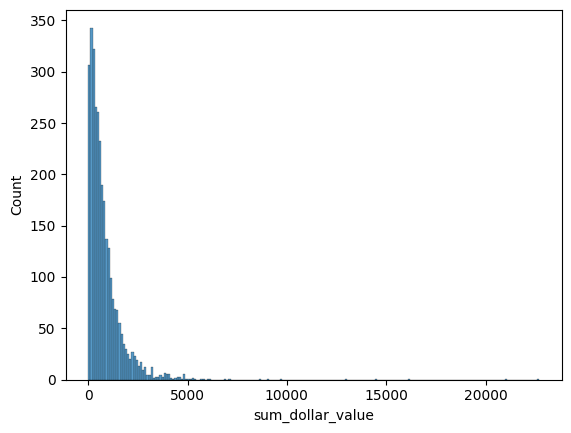

In [22]:
vis2_data = spark.sql("""
select postcode, sum(dollar_value) as sum_dollar_value from bnpl
group by postcode""")
vis2_data.show(5)
import matplotlib.pyplot as plt
%matplotlib inline
vis2_data = vis2_data.toPandas()
import seaborn as sns
sns.histplot(x = 'sum_dollar_value', data=vis2_data)
plt.show()

In [34]:
(vis2_data.sum_dollar_value > 5000).count()   
vis2_data.count()
vis2_data[vis2_data['sum_dollar_value'] > 5000].sort_values(by=['sum_dollar_value'])

,postcode,sum_dollar_value
2463,3129,5025.753876
2221,3632,5189.956967
3047,2040,5257.999472
1564,7139,5318.265936
2426,5015,5381.701409
1331,1234,5688.995420
792,6368,5797.547077
287,3337,6026.169484
1151,1208,6170.367270
327,4808,6932.819254


In [32]:
vis2_data[vis2_data['sum_dollar_value'] > 3000].value_counts()

postcode  sum_dollar_value
1156      3222.872933         1
4886      4621.932480         1
5268      3020.384336         1
5240      3370.000981         1
5210      3491.768437         1
                             ..
3023      4718.224810         1
2832      3203.453474         1
2720      4184.118386         1
2711      8615.879856         1
885       4957.865371         1
Length: 87, dtype: int64

In [30]:
bnpl_data.select(countDistinct('postcode'))


[Stage 161:=================================================>       (7 + 1) / 8]



count(DISTINCT postcode)
3092
